In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random
from datetime import datetime, timedelta

In [37]:
%reload_ext watermark


In [ ]:
watermark - -iversions

matplotlib: 3.10.8
numpy     : 2.4.2
pandas    : 3.0.0
seaborn   : 0.13.2



In [39]:
def gerar_dados_ficticios(num_registros=600):
    produtos = {
        "Laptop Gamer": {"categoria": "Eletrônicos", "preco": 7500.00},
        "Mouse Vertical": {"categoria": "Acessórios", "preco": 250.00},
        "Teclado Mecânico": {"categoria": "Acessórios", "preco": 550.00},
        "Monitor Ultrawide": {"categoria": "Eletrônicos", "preco": 2800.00},
        "Cadeira Gamer": {"categoria": "Móveis", "preco": 1200.00},
        "Headset 7.1": {"categoria": "Acessórios", "preco": 800.00},
        "Placa de Vídeo": {"categoria": "Hardware", "preco": 4500.00},
        "SSD 1TB": {"categoria": "Hardware", "preco": 600.00},
    }
    lista_produtos = list(produtos.keys())
    cidades_estados = {
        "São Paulo": "SP",
        "Rio de Janeiro": "RJ",
        "Belo Horizonte": "MG",
        "Porto Alegre": "RS",
        "Salvador": "BA",
        "Curitiba": "PR",
        "Fortaleza": "CE",
    }
    lista_cidades = list(cidades_estados.keys())

    dados_vendas = []
    data_inicial = datetime(2026, 1, 1)

    for i in range(num_registros):
        produto_nome = random.choice(lista_produtos)

        cidade = random.choice(lista_cidades)

        quantidade = np.random.randint(1, 8)

        data_pedido = data_inicial + timedelta(
            days=int(i / 5), hours=random.randint(0, 23)
        )

        if produto_nome in ["Mouse Vertical", "Teclado Mecânico"]:
            preco_unitario = produtos[produto_nome]["preco"] * np.random.uniform(
                0.9, 1.0
            )
        else:
            preco_unitario = produtos[produto_nome]["preco"]

        dados_vendas.append(
            {
                "ID_Pedido": 1000 + i,
                "Data_Pedido": data_pedido,
                "Nome_Produto": produto_nome,
                "Categoria": produtos[produto_nome]["categoria"],
                "Preco_Unitario": round(preco_unitario, 2),
                "Quantidade": quantidade,
                "ID_Cliente": np.random.randint(100, 150),
                "Cidade": cidade,
                "Estado": cidades_estados[cidade],
            }
        )

    return pd.DataFrame(dados_vendas)

In [40]:
df_vendas = gerar_dados_ficticios(500)

In [41]:
df_vendas.shape

(500, 9)

In [42]:
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado
0,1000,2026-01-01 14:00:00,Monitor Ultrawide,Eletrônicos,2800.00,1,110,Curitiba,PR
1,1001,2026-01-01 01:00:00,Laptop Gamer,Eletrônicos,7500.00,4,118,São Paulo,SP
2,1002,2026-01-01 09:00:00,Monitor Ultrawide,Eletrônicos,2800.00,2,141,Rio de Janeiro,RJ
3,1003,2026-01-01 04:00:00,Mouse Vertical,Acessórios,230.65,5,123,Rio de Janeiro,RJ
4,1004,2026-01-01 10:00:00,Cadeira Gamer,Móveis,1200.00,2,116,Curitiba,PR


In [43]:
df_vendas.info()

<class 'pandas.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID_Pedido       500 non-null    int64         
 1   Data_Pedido     500 non-null    datetime64[us]
 2   Nome_Produto    500 non-null    str           
 3   Categoria       500 non-null    str           
 4   Preco_Unitario  500 non-null    float64       
 5   Quantidade      500 non-null    int64         
 6   ID_Cliente      500 non-null    int64         
 7   Cidade          500 non-null    str           
 8   Estado          500 non-null    str           
dtypes: datetime64[us](1), float64(1), int64(3), str(4)
memory usage: 35.3 KB


In [44]:
df_vendas.describe()

,ID_Pedido,Data_Pedido,Preco_Unitario,Quantidade,ID_Cliente
count,500.000000,500,500.00000,500.000000,500.000000
mean,1249.500000,2026-02-19 23:08:31.200000,2107.22070,4.098000,125.004000
min,1000.000000,2026-01-01 01:00:00,226.77000,1.000000,100.000000
25%,1124.750000,2026-01-26 02:30:00,600.00000,2.000000,113.000000
50%,1249.500000,2026-02-19 23:00:00,800.00000,4.000000,126.000000
75%,1374.250000,2026-03-16 22:00:00,2800.00000,6.000000,137.000000
max,1499.000000,2026-04-10 16:00:00,7500.00000,7.000000,149.000000
std,144.481833,NaN,2216.54945,1.958588,13.879527


In [45]:
df_vendas["Data_Pedido"] = pd.to_datetime(df_vendas["Data_Pedido"])

In [46]:
df_vendas["Faturamento"] = df_vendas["Preco_Unitario"] * df_vendas["Quantidade"]

In [ ]:
df_vendas["Status_Entrega"] = df_vendas["Estado"].apply(
    lambda estado: "Rapida" if estado in ["SP", "RJ", "MJ"] else "Normal"
)

In [48]:
df_vendas.info()

<class 'pandas.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID_Pedido       500 non-null    int64         
 1   Data_Pedido     500 non-null    datetime64[us]
 2   Nome_Produto    500 non-null    str           
 3   Categoria       500 non-null    str           
 4   Preco_Unitario  500 non-null    float64       
 5   Quantidade      500 non-null    int64         
 6   ID_Cliente      500 non-null    int64         
 7   Cidade          500 non-null    str           
 8   Estado          500 non-null    str           
 9   Faturamento     500 non-null    float64       
 10  Status_Entrega  500 non-null    str           
dtypes: datetime64[us](1), float64(2), int64(3), str(5)
memory usage: 43.1 KB


In [49]:
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado,Faturamento,Status_Entrega
0,1000,2026-01-01 14:00:00,Monitor Ultrawide,Eletrônicos,2800.00,1,110,Curitiba,PR,2800.00,Normal
1,1001,2026-01-01 01:00:00,Laptop Gamer,Eletrônicos,7500.00,4,118,São Paulo,SP,30000.00,Rapida
2,1002,2026-01-01 09:00:00,Monitor Ultrawide,Eletrônicos,2800.00,2,141,Rio de Janeiro,RJ,5600.00,Rapida
3,1003,2026-01-01 04:00:00,Mouse Vertical,Acessórios,230.65,5,123,Rio de Janeiro,RJ,1153.25,Rapida
4,1004,2026-01-01 10:00:00,Cadeira Gamer,Móveis,1200.00,2,116,Curitiba,PR,2400.00,Normal


## Análise 1 - Top 10 Produtos Mais Vendidos

In [50]:
top_10_produtos = (
    df_vendas.groupby("Nome_Produto")["Quantidade"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

In [51]:
top_10_produtos

Nome_Produto
Monitor Ultrawide    318
Headset 7.1          277
SSD 1TB              275
Cadeira Gamer        263
Mouse Vertical       255
Teclado Mecânico     237
Placa de Vídeo       232
Laptop Gamer         192
Name: Quantidade, dtype: int64

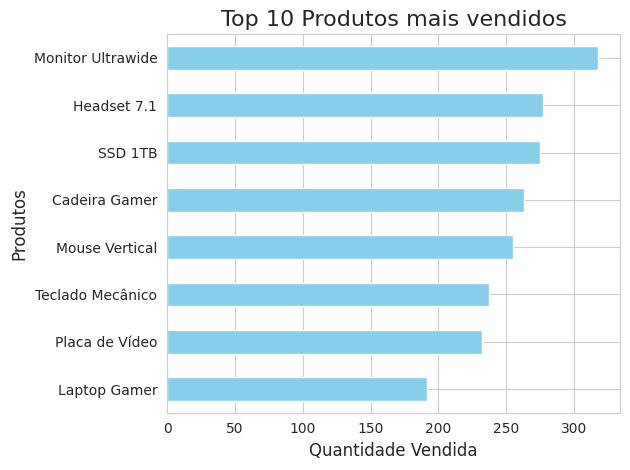

In [52]:
sns.set_style("whitegrid")

plt.Figure(figsize=(12, 7))

top_10_produtos.sort_values(ascending=True).plot(kind="barh", color="skyblue")

plt.title("Top 10 Produtos mais vendidos", fontsize=16)
plt.xlabel("Quantidade Vendida", fontsize=12)
plt.ylabel("Produtos", fontsize=12)

plt.tight_layout()
plt.show()

## Análise 2 - Faturamento Mensal

In [53]:
df_vendas["Mes"] = df_vendas["Data_Pedido"].dt.to_period("M")

In [ ]:
faturamento_mensal = df_vendas.groupby("Mes")["Faturamento"].sum()

In [55]:
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado,Faturamento,Status_Entrega,Mes
0,1000,2026-01-01 14:00:00,Monitor Ultrawide,Eletrônicos,2800.00,1,110,Curitiba,PR,2800.00,Normal,2026-01
1,1001,2026-01-01 01:00:00,Laptop Gamer,Eletrônicos,7500.00,4,118,São Paulo,SP,30000.00,Rapida,2026-01
2,1002,2026-01-01 09:00:00,Monitor Ultrawide,Eletrônicos,2800.00,2,141,Rio de Janeiro,RJ,5600.00,Rapida,2026-01
3,1003,2026-01-01 04:00:00,Mouse Vertical,Acessórios,230.65,5,123,Rio de Janeiro,RJ,1153.25,Rapida,2026-01
4,1004,2026-01-01 10:00:00,Cadeira Gamer,Móveis,1200.00,2,116,Curitiba,PR,2400.00,Normal,2026-01


In [56]:
faturamento_mensal.index = faturamento_mensal.index.strftime("%Y-%m")

In [ ]:
faturamento_mensal.map("R$ {:,.2f}".format)

Mes
2026-01    R$ 1,404,042.20
2026-02      R$ 928,264.21
2026-03    R$ 1,304,267.73
2026-04      R$ 624,895.38
Name: Faturamento, dtype: str

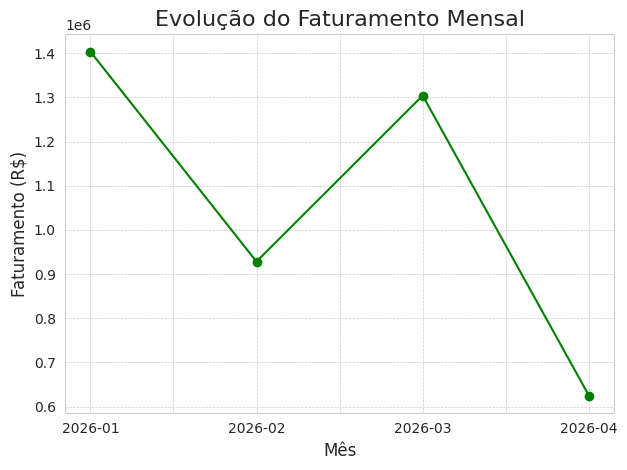

In [58]:
plt.Figure(figsize=(12, 6))

faturamento_mensal.plot(kind="line", marker="o", linestyle="-", color="green")

plt.title("Evolução do Faturamento Mensal", fontsize=16)
plt.xlabel("Mês", fontsize=12)

plt.ylabel("Faturamento (R$)", fontsize=12)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.tight_layout()

plt.show()

## Análise 3 - Vendas Por Estado

In [59]:
vendas_estado = (
    df_vendas.groupby("Estado")["Faturamento"].sum().sort_values(ascending=False)
)

In [60]:
vendas_estado.map("R$ {:,.2f}".format)

Estado
RS    R$ 863,552.83
BA    R$ 659,709.11
SP    R$ 587,002.01
PR    R$ 586,541.21
MG    R$ 549,597.58
CE    R$ 538,926.33
RJ    R$ 476,140.45
Name: Faturamento, dtype: str

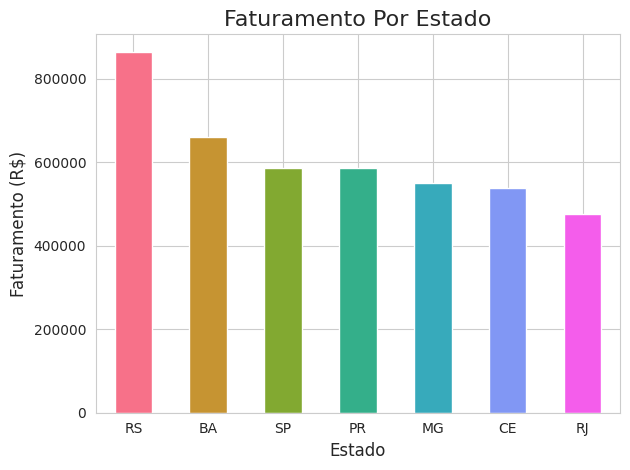

In [61]:
plt.Figure(figsize=(12, 7))

vendas_estado.plot(kind="bar", color=sns.color_palette("husl", 7))

plt.title("Faturamento Por Estado", fontsize=16)
plt.xlabel("Estado", fontsize=12)

plt.ylabel("Faturamento (R$)", fontsize=12)

plt.xticks(rotation=0)

plt.tight_layout()

plt.show()

## Análise 4 - Faturamento Por Categoria

In [64]:
faturamento_categoria = (
    df_vendas.groupby("Categoria")["Faturamento"].sum().sort_values(ascending=False)
)

In [65]:
faturamento_categoria.map("R$ {:,.2f}".format)

Categoria
Eletrônicos    R$ 2,330,400.00
Hardware       R$ 1,209,000.00
Acessórios       R$ 406,469.52
Móveis           R$ 315,600.00
Name: Faturamento, dtype: str

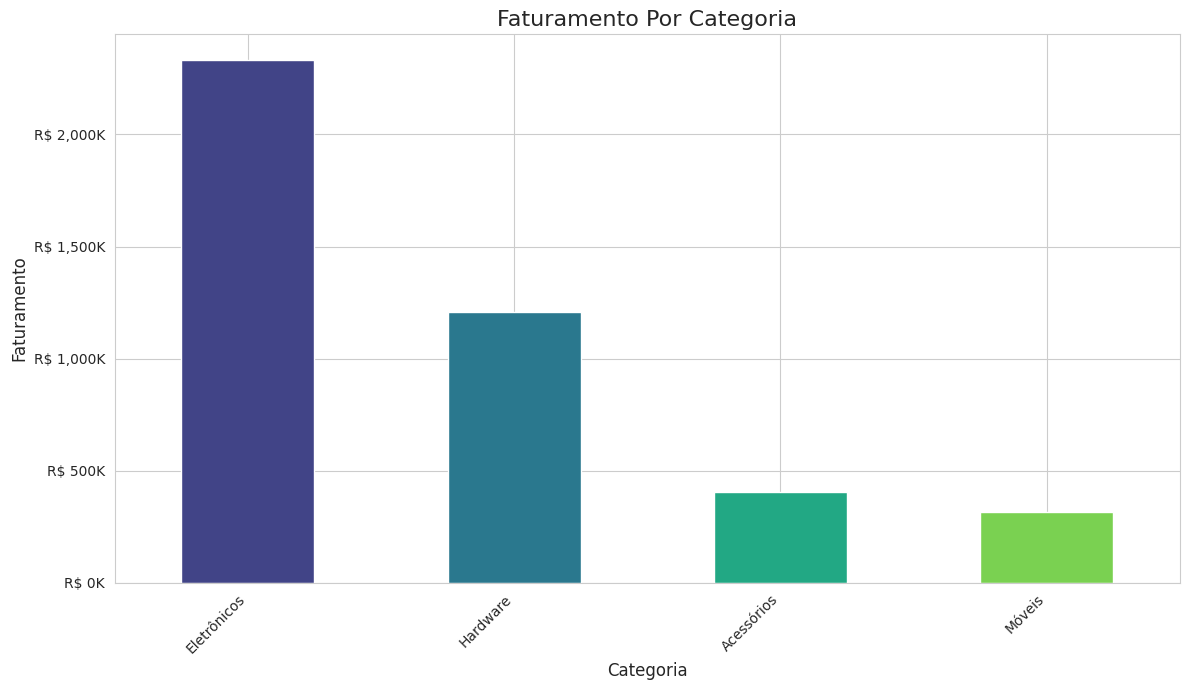

In [67]:
from matplotlib.ticker import FuncFormatter

faturamento_ordenado = faturamento_categoria.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 7))


def formatar_milhares(y, pos):
    return f"R$ {y/1000:,.0f}K"


formater = FuncFormatter(formatar_milhares)

ax.yaxis.set_major_formatter(formater)

faturamento_ordenado.plot(
    kind="bar", ax=ax, color=sns.color_palette("viridis", len(faturamento_ordenado))
)

ax.set_title("Faturamento Por Categoria", fontsize=16)
ax.set_xlabel("Categoria", fontsize=12)
ax.set_ylabel("Faturamento", fontsize=12)

plt.xticks(rotation=45, ha="right")

plt.tight_layout()

plt.show()